# TEXT CLASSIFICATION 

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [3]:
#loaded the dataFrame from a CSV file named 'reviews.csv'
df=pd.read_csv('Emotions_training.csv')
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [4]:
#handles missing values in the 'text' column
df.dropna(subset=['text'], inplace=True)

# Lower case

In [5]:
#convert the 'text' column to lower case
df['text'] = df['text'].str.lower() 

# Remove Links

In [6]:
#to remove URL links using regular expressions
def remove_links(text):
    return re.sub(r'http\S+', '', text)

#apply the function to 'content' column
df['text'] = df['text'].apply(remove_links)

# Remove next lines(\n)

In [7]:
#to remove newline characters from the 'text' column
df['text'] = df['text'].str.replace('\n', '') 

# Words containing numbers

In [9]:
#to remove words containing digits from the 'text' column using apply() method and lambda function
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in str(x).split() if not re.match('.*\d.*', str(word))))


# Extra spaces

In [10]:
#to remove extra spaces from the 'text' column using resub() and lambda function
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x)) 

# Special Characters

In [11]:
#to remove special characters using regular expression
df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)


# Removal of stop words

In [12]:
nltk.download('stopwords')

#stopwords for English language
stop_words = set(stopwords.words('english'))

#function to remove stop words from text
def remove_stopwords(text):
    #tokenize the text into words
    words = text.split()
    #to remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    #to join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

#apply the function to the 'content' column 
df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Moulya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming

In [13]:
#importing the PorterStemmer class from nltk
from nltk.stem import PorterStemmer

#initializing porter stemmer
porter_stemmer = PorterStemmer()

#to apply stemming to a given text
def apply_stemming(text):
    words = text.split()  #tokenize the text into words
    stemmed_words = [porter_stemmer.stem(word) for word in words]  #apply stemming to each word
    stemmed_text = ' '.join(stemmed_words)  #join the stemmed words back into a sentence
    return stemmed_text
    
#applying function to the 'content' column 
df['text'] = df['text'].apply(apply_stemming)

# Lemmatization

In [14]:
#importing the WordNetLemmatizer class from nltk
from nltk.stem import WordNetLemmatizer

#initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    words = text.split()  # Tokenize the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Apply lemmatization to each word
    lemmatized_text = ' '.join(lemmatized_words)  # Join the lemmatized words back into a sentence
    return lemmatized_text
    
#apply function to the 'content' column 
df['text'] = df['text'].apply(apply_lemmatization)
df

,text,label
0,didnt feel humili,0
1,go feel hopeless damn hope around someon care ...,0
2,im grab minut post feel greedi wrong,3
3,ever feel nostalg fireplac know still properti,2
4,feel grouchi,3
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turn feel pathet still wait tabl sub teach degre,0
15997,feel strong good overal,1
15998,feel like rude comment im glad,3


In [12]:
import pandas as pd

df = pd.read_csv('Emotions_training.csv')

#Display dataset
print("Dataset:")
print(df)

#distribution of the 'label' column
label_counts = df['label'].value_counts()

#Display the label distribution
print("\nLabel Distribution:")
print(label_counts)

# Determine if the dataset is balanced or imbalanced
# Here, we define a threshold to consider a dataset as balanced
# For instance, if the largest class is less than 1.5 times the size of the smallest class, we consider it balanced

threshold = 1.5

#Calculate the ratio of the largest class to the smallest class
max_count = label_counts.max()
min_count = label_counts.min()
balance_ratio = max_count / min_count

print("\nBalance Ratio:", balance_ratio)

if balance_ratio <= threshold:
    print("\nThe 'label' column is balanced.")
else:
    print("\nThe 'label' column is imbalanced.")


Dataset:
                                                    text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]

Label Distribution:
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

Balance Ratio: 9.374125874125873

The 'label' column is imbalanced.


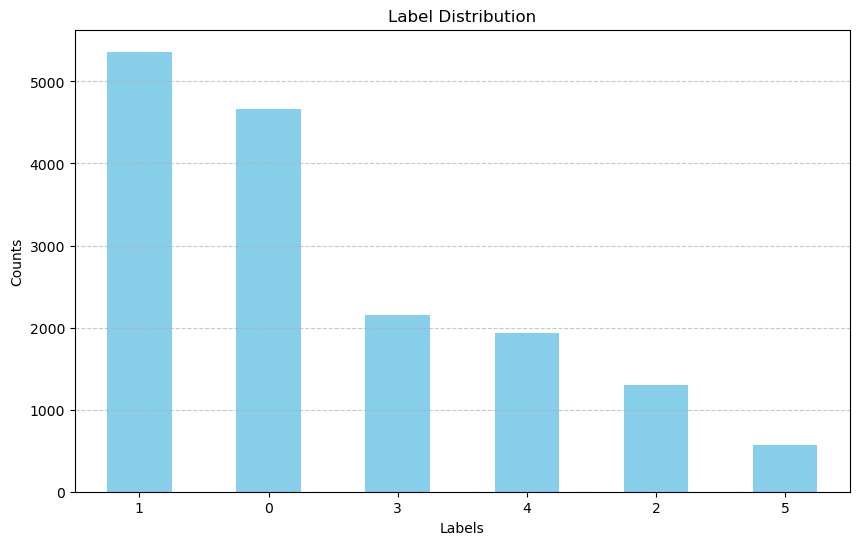

In [9]:
import matplotlib.pyplot as plt
# Plotting the bar graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0) # Rotates the labels on x-axis to 0 degrees for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dataset:
                                                    text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]

Label Distribution:
label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

Balance Ratio: 9.374125874125873

The 'la

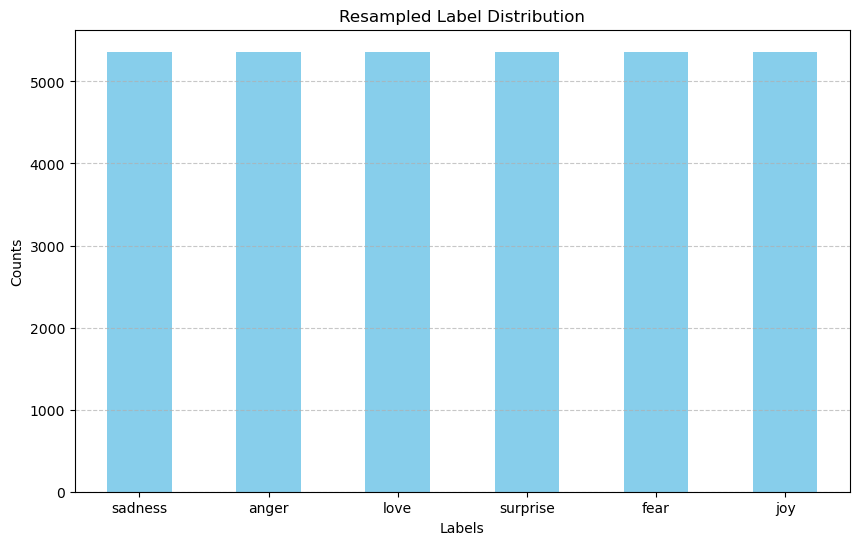

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Define the Emotions dictionary
Emotions = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

# Load your dataset
df = pd.read_csv('Emotions_training.csv')

# Display the dataset
print("Dataset:")
print(df)

# Map numerical labels to emotion names
df['label'] = df['label'].map(Emotions)

# Check the distribution of the 'label' column
label_counts = df['label'].value_counts()

# Display the label distribution
print("\nLabel Distribution:")
print(label_counts)

# Determine if the dataset is balanced or imbalanced
threshold = 1.5

# Calculate the ratio of the largest class to the smallest class
max_count = label_counts.max()
min_count = label_counts.min()
balance_ratio = max_count / min_count

print("\nBalance Ratio:", balance_ratio)

if balance_ratio <= threshold:
    print("\nThe 'label' column is balanced.")
else:
    print("\nThe 'label' column is imbalanced.")

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Oversample the minority classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['label'] = y_resampled

# Check the distribution of the resampled 'label' column
label_counts_resampled = df_resampled['label'].value_counts()

# Display the resampled label distribution
print("\nResampled Label Distribution:")
print(label_counts_resampled)

# Plotting the bar graph for the resampled data
plt.figure(figsize=(10, 6))
label_counts_resampled.plot(kind='bar', color='skyblue')
plt.title('Resampled Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0) # Rotates the labels on x-axis to 0 degrees for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Balance Ratio: 9.374125874125873

The 'label' column is imbalanced.

Training Set Distribution:
label
1    3754
0    3754
5    3753
2    3753
3    3753
4    3753
Name: count, dtype: int64

Testing Set Distribution:
label
4    1078
2    1078
5    1078
3    1078
0    1077
1    1077
Name: count, dtype: int64

Validation Set Distribution:
label
0    531
3    531
2    531
4    531
1    531
5    531
Name: count, dtype: int64


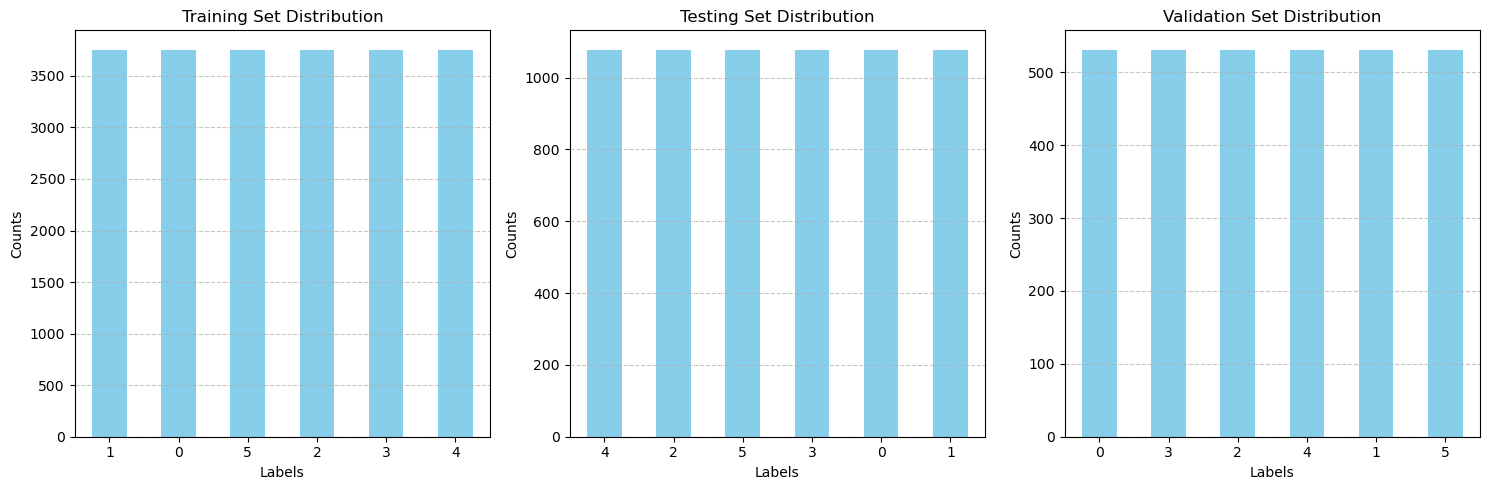

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#calculate the ratio of the largest class to the smallest class
max_count = label_counts.max()
min_count = label_counts.min()
balance_ratio = max_count / min_count

print("\nBalance Ratio:", balance_ratio)

if balance_ratio <= threshold:
    print("\nThe 'label' column is balanced.")
else:
    print("\nThe 'label' column is imbalanced.")

#separate features and target
X = df.drop('label', axis=1)
y = df['label']

#oversample the minority classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

#create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['label'] = y_resampled

#split the resampled dataset into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

#split the temp dataset into testing (20% of original) and validation (10% of original)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

#check the distribution of the training, testing, and validation sets
train_counts = pd.Series(y_train).value_counts()
test_counts = pd.Series(y_test).value_counts()
val_counts = pd.Series(y_val).value_counts()

print("\nTraining Set Distribution:")
print(train_counts)
print("\nTesting Set Distribution:")
print(test_counts)
print("\nValidation Set Distribution:")
print(val_counts)

#plotting the bar graph for the resampled data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
train_counts.plot(kind='bar', color='skyblue')
plt.title('Training Set Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
test_counts.plot(kind='bar', color='skyblue')
plt.title('Testing Set Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
val_counts.plot(kind='bar', color='skyblue')
plt.title('Validation Set Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Featuring Engineering

Convert the Text corpus to a matrix of words counts. (Vectorize the Text data)

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#loading dataset
df = pd.read_csv('Emotions_training.csv')
text_column = 'text'

#initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

#fit the vectorizer to the corpus and transform the corpus into a matrix of TF-IDF features
X = vectorizer.fit_transform(df[text_column])

#TF-IDF matrix
tfidf_matrix = X.toarray()

#feature names (words)
feature_names = vectorizer.get_feature_names_out()

#print
print("TF-IDF Matrix:")
print(tfidf_matrix)
print("\nFeature Names:")
print(feature_names)


TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Feature Names:
['aa' 'aaaaaaand' 'aaaaand' ... 'zum' 'zumba' 'zz']
